# PROJECT 3A_RTS: Big data analysis of an electricity power consumption (Tetouan Town - Morocco) and visualizing Prediction results

## 1) Import useful libraries¶

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

## 2) Retrieve the dataset

In [2]:
consumptionTetuan = pd.read_csv("Tetuan City power consumption.csv")

In [3]:
zone1 = consumptionTetuan['Zone 1 Power Consumption']
zone2 = consumptionTetuan['Zone 2  Power Consumption'] 
zone3 = consumptionTetuan['Zone 3  Power Consumption']

## 3) Dense Neural Network (DNN)

In [4]:
X = consumptionTetuan.drop(['DateTime', 'Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption'], axis = 1)
y = zone3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=False)

In [5]:
# Méthode 1: Avec bibliothèque

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)

In [6]:
# Méthode 2: En apppliquant les formules

mean = X_train.mean()
std  = X_train.std()
X_train_norm2 = (X_train - mean) / std
X_test_norm = (X_test - mean) / std

In [7]:
df_X_train_norm = pd.DataFrame(X_train_norm)

df_X_train_norm.describe()

,0,1,2,3,4
count,4.193200e+04,4.193200e+04,4.193200e+04,4.193200e+04,4.193200e+04
mean,9.116183e-16,1.831164e-15,3.463745e-14,4.878344e-15,2.992402e-17
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.742878e+00,-3.505243e+00,-8.745300e-01,-7.187924e-01,-6.283561e-01
25%,-7.869102e-01,-6.427112e-01,-8.627656e-01,-7.185708e-01,-6.275333e-01
50%,6.051341e-02,1.062287e-01,-8.585640e-01,-6.687119e-01,-5.346948e-01
75%,7.381160e-01,8.501881e-01,1.169954e+00,5.833378e-01,2.365245e-01
max,3.438438e+00,1.628388e+00,1.213230e+00,3.438191e+00,6.568520e+00


In [8]:
X_train_norm2.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows
count,4.193200e+04,4.193200e+04,4.193200e+04,4.193200e+04,4.193200e+04
mean,-1.726059e-16,-1.815941e-14,-2.225156e-14,1.194384e-14,2.720123e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.742845e+00,-3.505201e+00,-8.745195e-01,-7.187839e-01,-6.283486e-01
25%,-7.869008e-01,-6.427036e-01,-8.627553e-01,-7.185623e-01,-6.275259e-01
50%,6.051269e-02,1.062274e-01,-8.585538e-01,-6.687039e-01,-5.346885e-01
75%,7.381072e-01,8.501779e-01,1.169940e+00,5.833309e-01,2.365217e-01
max,3.438397e+00,1.628369e+00,1.213215e+00,3.438150e+00,6.568441e+00


In [9]:
X_train_norm2.shape

(41932, 5)

In [10]:
X_test_norm.shape

(10484, 5)

In [11]:
shape=X_train_norm2.shape[1] 

model = keras.models.Sequential()
model.add(keras.layers.Input(shape , name="InputLayer")) 
model.add(keras.layers.Dense(6, activation='relu', name='Dense_n1'))
model.add(keras.layers.Dense(12, activation='relu', name='Dense_n2'))
model.add(keras.layers.Dense(1, name='Output'))

model.compile(optimizer = 'adam',
              loss      = 'mae',
              metrics   = 'mae' )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_n1 (Dense)            (None, 6)                 36        
                                                                 
 Dense_n2 (Dense)            (None, 12)                84        
                                                                 
 Output (Dense)              (None, 1)                 13        
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [12]:
epochs = 60

history = model.fit(X_train_norm2,
                    y_train,
                    epochs          = epochs,
                    batch_size      = 100,
                    verbose         =  1,
                    validation_data = (X_test_norm, y_test))

Epoch 1/60
420/420 [==============================] - 1s 2ms/step - loss: 19258.3672 - mae: 19258.3672 - val_loss: 12053.2422 - val_mae: 12053.2422
Epoch 2/60
420/420 [==============================] - 1s 2ms/step - loss: 19101.7969 - mae: 19101.7969 - val_loss: 11813.1328 - val_mae: 11813.1328
Epoch 3/60
420/420 [==============================] - 1s 1ms/step - loss: 18567.1777 - mae: 18567.1777 - val_loss: 11227.4531 - val_mae: 11227.4531
Epoch 4/60
420/420 [==============================] - 1s 1ms/step - loss: 17496.0820 - mae: 17496.0820 - val_loss: 10208.8613 - val_mae: 10208.8613
Epoch 5/60
420/420 [==============================] - 1s 1ms/step - loss: 15790.4541 - mae: 15790.4541 - val_loss: 8700.8896 - val_mae: 8700.8896
Epoch 6/60
420/420 [==============================] - 1s 2ms/step - loss: 13465.4932 - mae: 13465.4932 - val_loss: 6825.6040 - val_mae: 6825.6040
Epoch 7/60
420/420 [==============================] - 1s 2ms/step - loss: 11052.9902 - mae: 11052.9902 - val_loss: 5

420/420 [==============================] - 1s 1ms/step - loss: 4218.3970 - mae: 4218.3970 - val_loss: 5071.4165 - val_mae: 5071.4165
Epoch 58/60
420/420 [==============================] - 1s 1ms/step - loss: 4211.4414 - mae: 4211.4414 - val_loss: 5062.1519 - val_mae: 5062.1519
Epoch 59/60
420/420 [==============================] - 1s 1ms/step - loss: 4203.8506 - mae: 4203.8506 - val_loss: 5053.0703 - val_mae: 5053.0703
Epoch 60/60
420/420 [==============================] - 1s 2ms/step - loss: 4195.6499 - mae: 4195.6499 - val_loss: 5132.8721 - val_mae: 5132.8721


In [13]:
score = model.evaluate(X_test_norm, y_test, verbose=0)

print('X_test / loss      : {:5.4f}'.format(score[0]))
print('X_test / mae       : {:5.4f}'.format(score[1]))


X_test / loss      : 5132.8730
X_test / mae       : 5132.8730


Text(0.5, 1.0, 'Training and Validation Mae')

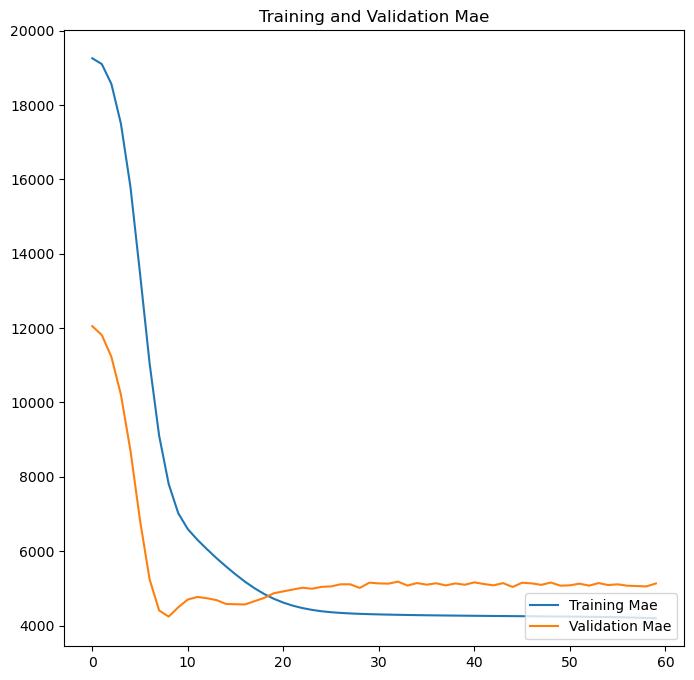

In [14]:
mae = history.history['mae']
val_mae = history.history['val_mae']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, mae, label='Training Mae')
plt.plot(epochs_range, val_mae, label='Validation Mae')
plt.legend(loc='lower right')
plt.title('Training and Validation Mae')


In [15]:
# avec heure
consumptionTetuan['DateTime']=pd.to_datetime(consumptionTetuan['DateTime']) 
def conv(data):
    data['month']=data['DateTime'].dt.month
    data['day']=data['DateTime'].dt.day
    data['hour']=data['DateTime'].dt.hour    
    return data

consumptionTetuan = conv(consumptionTetuan)

In [16]:
X = consumptionTetuan.drop(['DateTime', 'Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'month', 'day'], axis = 1)
y = zone3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=False)

In [17]:
# En apppliquant les formules

mean = X_train.mean()
std  = X_train.std()
X_train_normHour = (X_train - mean) / std
X_test_norm = (X_test - mean) / std

In [18]:
X_train_normHour.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,hour
0,-2.185974,0.383263,-0.860655,-0.718616,-0.627580,-1.659833
1,-2.210354,0.426842,-0.860655,-0.718548,-0.627841,-1.659833
2,-2.227336,0.426842,-0.861915,-0.718577,-0.627726,-1.659833
3,-2.259618,0.457970,-0.860655,-0.718473,-0.627757,-1.659833
4,-2.293245,0.501548,-0.861495,-0.718627,-0.627841,-1.659833


In [19]:
X_train_normHour.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,hour
count,4.193200e+04,4.193200e+04,4.193200e+04,4.193200e+04,4.193200e+04,4.193200e+04
mean,-1.726059e-16,-1.815941e-14,-2.225156e-14,1.194384e-14,2.720123e-14,-2.289709e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.742845e+00,-3.505201e+00,-8.745195e-01,-7.187839e-01,-6.283486e-01,-1.659833e+00
25%,-7.869008e-01,-6.427036e-01,-8.627553e-01,-7.185623e-01,-6.275259e-01,-9.377622e-01
50%,6.051269e-02,1.062274e-01,-8.585538e-01,-6.687039e-01,-5.346885e-01,-7.127720e-02
75%,7.381072e-01,8.501779e-01,1.169940e+00,5.833309e-01,2.365217e-01,7.952078e-01
max,3.438397e+00,1.628369e+00,1.213215e+00,3.438150e+00,6.568441e+00,1.661693e+00


In [20]:
X_train_normHour.shape

(41932, 6)

In [21]:
shape=X_train_normHour.shape[1] 

model2 = keras.models.Sequential()
model2.add(keras.layers.Input(shape , name="InputLayer")) 
model2.add(keras.layers.Dense(7, activation='relu', name='Dense_n1'))
model2.add(keras.layers.Dense(12, activation='relu', name='Dense_n2'))
model2.add(keras.layers.Dense(1, name='Output'))

model2.compile(optimizer = 'adam',
              loss      = 'mae',
              metrics   = 'mae' )

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_n1 (Dense)            (None, 7)                 49        
                                                                 
 Dense_n2 (Dense)            (None, 12)                96        
                                                                 
 Output (Dense)              (None, 1)                 13        
                                                                 
Total params: 158
Trainable params: 158
Non-trainable params: 0
_________________________________________________________________


In [22]:
epochs = 40

history = model2.fit(X_train_normHour,
                    y_train,
                    epochs          = epochs,
                    batch_size      = 100,
                    verbose         =  1,
                    validation_data = (X_test_norm, y_test))

Epoch 1/40
420/420 [==============================] - 1s 2ms/step - loss: 19257.1953 - mae: 19257.1953 - val_loss: 12043.9805 - val_mae: 12043.9805
Epoch 2/40
420/420 [==============================] - 1s 2ms/step - loss: 19057.6582 - mae: 19057.6582 - val_loss: 11650.5830 - val_mae: 11650.5830
Epoch 3/40
420/420 [==============================] - 1s 1ms/step - loss: 18335.9121 - mae: 18335.9121 - val_loss: 10626.7402 - val_mae: 10626.7402
Epoch 4/40
420/420 [==============================] - 1s 1ms/step - loss: 16864.1914 - mae: 16864.1914 - val_loss: 8795.4453 - val_mae: 8795.4453
Epoch 5/40
420/420 [==============================] - 1s 1ms/step - loss: 14502.6514 - mae: 14502.6514 - val_loss: 6463.8047 - val_mae: 6463.8047
Epoch 6/40
420/420 [==============================] - 1s 1ms/step - loss: 11443.6465 - mae: 11443.6465 - val_loss: 5308.4937 - val_mae: 5308.4937
Epoch 7/40
420/420 [==============================] - 1s 2ms/step - loss: 9184.1162 - mae: 9184.1162 - val_loss: 4869.

Text(0.5, 1.0, 'Training and Validation Mae')

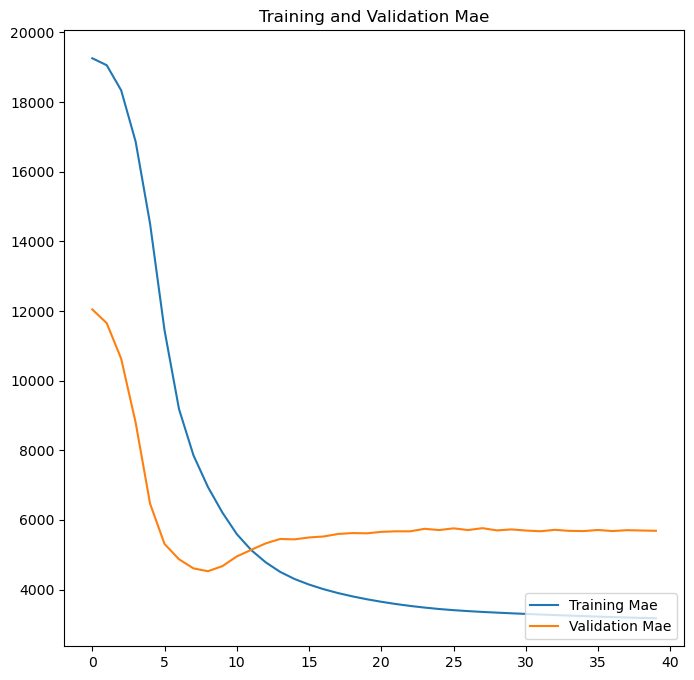

In [23]:
mae = history.history['mae']
val_mae = history.history['val_mae']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, mae, label='Training Mae')
plt.plot(epochs_range, val_mae, label='Validation Mae')
plt.legend(loc='lower right')
plt.title('Training and Validation Mae')


In [24]:
score = model2.evaluate(X_test_norm, y_test, verbose=0)

print('X_test / loss      : {:5.4f}'.format(score[0]))
print('X_test / mae       : {:5.4f}'.format(score[1]))


X_test / loss      : 5686.5190
X_test / mae       : 5686.5190


In [25]:
predictions = model2.predict(X_test_norm)

328/328 [==============================] - 0s 1ms/step


In [26]:
predictions

array([[14050.933],
       [14052.394],
       [13649.938],
       ...,
       [25075.393],
       [25078.713],
       [25083.674]], dtype=float32)

In [27]:
print("MAE =", mean_absolute_error(y_test, predictions))

MAE = 5686.518636882737


In [28]:
y_test

41932    12348.69301
41933    12593.79939
41934    12693.00912
41935    12529.60486
41936    12220.30395
            ...     
52411    14780.31212
52412    14428.81152
52413    13806.48259
52414    13512.60504
52415    13345.49820
Name: Zone 3  Power Consumption, Length: 10484, dtype: float64